In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU

from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from keras import optimizers
from keras.utils import np_utils
from sklearn import metrics
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from IPython.display import display, Image
import matplotlib.cm as cm
from scipy import stats
from utils import show_graph


Using TensorFlow backend.


In [4]:
import h5py

h5f = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

In [5]:
x_test.shape

(18000, 32, 32)

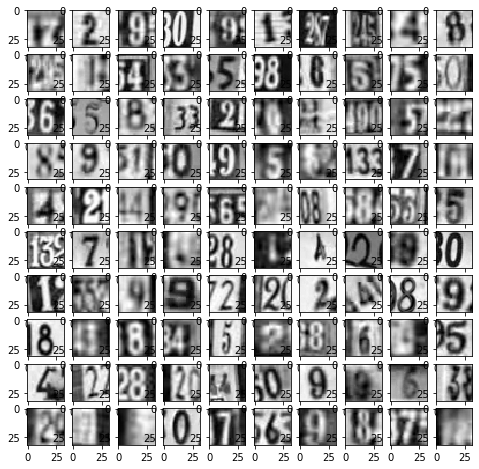

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [7]:
print(x_train.shape)


(42000, 32, 32)


In [8]:
print(y_train.shape)

(42000,)


In [9]:
x_train = x_train[0:22000,:]
y_train = y_train[0:22000]
x_test = x_test[0:8000,:]
y_test = y_test[0:8000]

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(22000, 32, 32)
(22000,)
(8000, 32, 32)
(8000,)


In [11]:
print(x_train.dtype)

float32


In [12]:
print(y_train.dtype)

uint8


In [13]:
print(x_test.dtype)

float32


In [14]:
print(y_test.dtype)

uint8


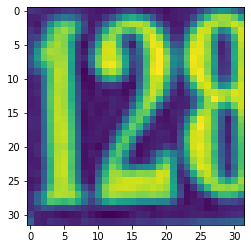

In [15]:
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])


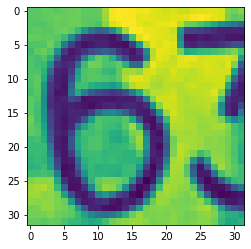

In [16]:
img1 = plt.imshow(x_train[1])

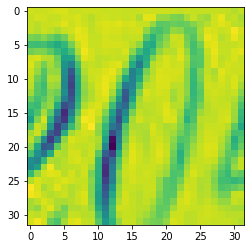

In [17]:
img3 = plt.imshow(x_train[7])

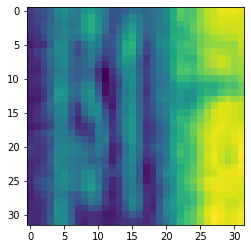

In [18]:
img4 = plt.imshow(x_test[0])


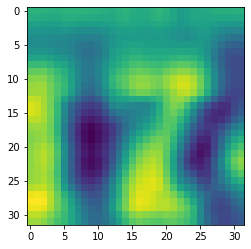

In [19]:
img4 = plt.imshow(x_test[1])

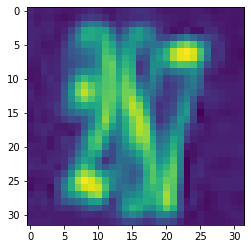

In [20]:
img4 = plt.imshow(x_test[7])

In [21]:
x_train

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]],

       [[ 86.9591,  87.0685,  88.3735, ...,  91.8014,  89.7477,
          92.5302],
        [ 86.688 ,  86.9114,  87.4337, ...,  90.7306,  87.204 ,
          88.5629],
        [ 85.9654,  85.8145,  85.9239, ...,  63.8626,  59.8199,
          54.8805],
        ...,
        [ 90.2236,  91.0448,  93.4637, ...,  55.3535,  48.5822,
          44.0557],
        [ 90.6427,  90.4039,  90.937 , ...,  78.2696,  77.4977,
          74.27  ],
        [ 88.0236,  88.1977,  86.6709, ...,  75.

In [22]:
y_train

array([2, 6, 7, ..., 1, 0, 4], dtype=uint8)

In [23]:
x_test

array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]],

       [[115.1609, 114.161 , 113.1611, ..., 112.0302, 112.6711,
         112.7851],
        [110.5743, 110.2754, 108.9766, ..., 106.1448, 106.7857,
         107.0137],
        [102.8031, 102.5042, 101.7924, ...,  95.776 ,  95.531 ,
          95.645 ],
        ...,
        [169.8457, 170.6176, 167.8028, ...,  45.1708,  55.6967,
          62.81  ],
        [157.7329, 157.6189, 153.8042, ...,  42.9538,  50.1811,
          56.1805],
        [150.3207, 149.2068, 144.8051, ...,  42.

In [24]:
y_test

array([1, 7, 2, ..., 7, 1, 3], dtype=uint8)

In [25]:
height = x_train.shape[0]
width = x_train.shape[1]
channels = x_train.shape[2]

In [26]:
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

Image Height       :  22000
Image Width        :  32
Number of Channels :  32


In [27]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
y_train[2]


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [28]:
print ('Train size:', x_train.shape[0])
print ('Test size:', x_test.shape[0])

Train size: 22000
Test size: 8000


In [29]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the input
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (22000, 32, 32)
22000 train samples
8000 test samples


In [31]:
import cv2


In [35]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)

In [36]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (22000, 32, 32, 1)
x_test shape: (8000, 32, 32, 1)
22000 train samples
8000 test samples


In [37]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten,Reshape
from keras.layers.convolutional import Convolution2D,MaxPooling2D


In [42]:
# Define model
model = Sequential()
# 1st Conv Layer

model.add(Convolution2D(32, (3, 3), input_shape=(32, 32, 1)))
model.add(Activation('relu'))


In [43]:
# 2nd Conv Layer
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

# Prediction Layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [44]:
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]


In [46]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

# Train the model
model.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
          validation_data=(x_test, y_test), callbacks=callback_list)

Train on 22000 samples, validate on 8000 samples
Epoch 1/10
   32/22000 [..............................] - ETA: 1:11 - loss: 0.0314 - accuracy: 1.0000

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


22000/22000 [==============================] - 71s 3ms/step - loss: 0.0929 - accuracy: 0.9715 - val_loss: 0.8048 - val_accuracy: 0.8389
Epoch 2/10
22000/22000 [==============================] - 74s 3ms/step - loss: 0.0820 - accuracy: 0.9737 - val_loss: 0.8954 - val_accuracy: 0.8397
Epoch 3/10
22000/22000 [==============================] - 73s 3ms/step - loss: 0.0636 - accuracy: 0.9802 - val_loss: 0.9750 - val_accuracy: 0.8385
Epoch 4/10
22000/22000 [==============================] - 73s 3ms/step - loss: 0.0581 - accuracy: 0.9820 - val_loss: 1.0299 - val_accuracy: 0.8366
Epoch 5/10
22000/22000 [==============================] - 76s 3ms/step - loss: 0.0655 - accuracy: 0.9784 - val_loss: 1.1449 - val_accuracy: 0.8031
Epoch 6/10
22000/22000 [==============================] - 74s 3ms/step - loss: 0.0528 - accuracy: 0.9834 - val_loss: 1.0428 - val_accuracy: 0.8487
Epoch 7/10
22000/22000 [==============================] - 73s 3ms/step - loss: 0.0364 - accuracy: 0.9893 - val_loss: 1.0981 - val

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3211392   
_________________________________________________________________
activation_7 (Activation)    (None, 128)              

In [48]:
##Now, to the above model add max pooling layer of filter size 2x2 and dropout layer with p=0.25 
##after the 2 conv layers and run the model

In [49]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (22000, 32, 32, 1)
x_test shape: (8000, 32, 32, 1)
22000 train samples
8000 test samples


In [50]:
# Define Model
model2 = Sequential()

# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

#Add a MaxPooling Layer of size 2X2 
model2.add(MaxPooling2D(pool_size=(2,2), name='max_1'))
    
#Apply Dropout with 0.25 probability 
model2.add(Dropout(0.25,name='drop_1'))

#Flatten the layer

model2.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'

model2.add(Dense(128, activation='relu',name='dense_1'))
    
# More Dropout - Apply Dropout with 0.5 probability 

model2.add(Dropout(0.5,name='drop_2'))

# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS,
           validation_data=(x_test, y_test), callbacks=callback_list)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 1...)`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 22000 samples, validate on 8000 samples
Epoch 1/10
22000/22000 [==============================] - 48s 2ms/step - loss: 1.5079 - accuracy: 0.4881 - val_loss: 0.7227 - val_accuracy: 0.8026
Epoch 2/10
   64/22000 [..............................] - ETA: 43s - loss: 0.7685 - accuracy: 0.7812

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


22000/22000 [==============================] - 47s 2ms/step - loss: 0.7916 - accuracy: 0.7553 - val_loss: 0.5448 - val_accuracy: 0.8484
Epoch 3/10
22000/22000 [==============================] - 47s 2ms/step - loss: 0.6744 - accuracy: 0.7906 - val_loss: 0.5310 - val_accuracy: 0.8494
Epoch 4/10
22000/22000 [==============================] - 46s 2ms/step - loss: 0.6105 - accuracy: 0.8086 - val_loss: 0.4949 - val_accuracy: 0.8618
Epoch 5/10
22000/22000 [==============================] - 47s 2ms/step - loss: 0.5683 - accuracy: 0.8184 - val_loss: 0.4349 - val_accuracy: 0.8742
Epoch 6/10
22000/22000 [==============================] - 45s 2ms/step - loss: 0.5372 - accuracy: 0.8311 - val_loss: 0.4403 - val_accuracy: 0.8725
Epoch 7/10
22000/22000 [==============================] - 47s 2ms/step - loss: 0.5096 - accuracy: 0.8388 - val_loss: 0.4259 - val_accuracy: 0.8809
Epoch 8/10
22000/22000 [==============================] - 47s 2ms/step - loss: 0.4937 - accuracy: 0.8437 - val_loss: 0.4267 - val

In [51]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
activation_9 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 14, 14, 32)        0         
_________________________________________________________________
drop_1 (Dropout)             (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)             

In [52]:
### Now, to the above model, lets add Data Augmentation 
### Import the ImageDataGenrator from keras and fit the training images

In [53]:
from keras.preprocessing.image import ImageDataGenerator
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

In [54]:
#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

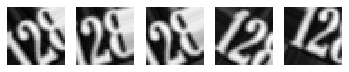

In [55]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [56]:
#Run the above model using fit_generator()

In [57]:
model2.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=687, epochs=10)`
  after removing the cwd from sys.path.


Epoch 1/10
687/687 [==============================] - 48s 69ms/step - loss: 2.0979 - accuracy: 0.2570 - val_loss: 0.8493 - val_accuracy: 0.8199
Epoch 2/10
687/687 [==============================] - 50s 73ms/step - loss: 1.9392 - accuracy: 0.3120 - val_loss: 0.7319 - val_accuracy: 0.8347
Epoch 3/10
687/687 [==============================] - 50s 73ms/step - loss: 1.8446 - accuracy: 0.3519 - val_loss: 0.7038 - val_accuracy: 0.8250
Epoch 4/10
687/687 [==============================] - 49s 71ms/step - loss: 1.7831 - accuracy: 0.3725 - val_loss: 0.6663 - val_accuracy: 0.8306
Epoch 5/10
687/687 [==============================] - 50s 72ms/step - loss: 1.7458 - accuracy: 0.3902 - val_loss: 0.6616 - val_accuracy: 0.8263
Epoch 6/10
687/687 [==============================] - 47s 69ms/step - loss: 1.7006 - accuracy: 0.4035 - val_loss: 0.7746 - val_accuracy: 0.7981
Epoch 7/10
687/687 [==============================] - 47s 69ms/step - loss: 1.6753 - accuracy: 0.4106 - val_loss: 0.7039 - val_accuracy:

In [58]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
activation_9 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 14, 14, 32)        0         
_________________________________________________________________
drop_1 (Dropout)             (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)             

In [61]:
##Report the final train and validation accuracy
##Print the classification accuracy metrics

model accuracy : 0.9013749957084656


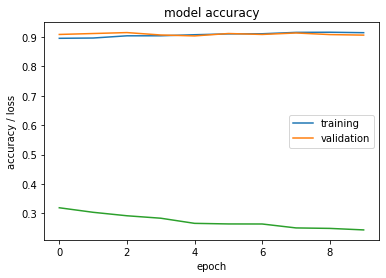

In [63]:
import numpy as np

batch_size=32
epochs = 10
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose= False )
loss,accuracy  = model2.evaluate(x_test, y_test, verbose=False)
print("model accuracy :" , accuracy)
#print("validation accuracy : ", val_accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [66]:
loss_and_metrics = model2.evaluate(x_train, y_train)
print(loss_and_metrics)

22000/22000 [==============================] - 6s 288us/step
[0.102319841503081, 0.975454568862915]


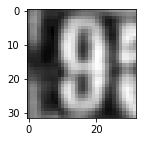

9


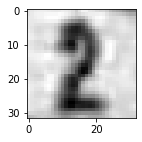

2


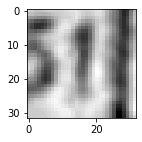

1


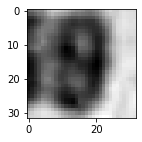

9


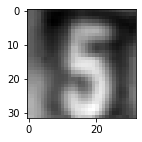

5


In [67]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[3].reshape(32,32),cmap="gray")
plt.show()
print(np.argmax(model2.predict(x_test[3].reshape(1,32,32,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[2].reshape(32,32),cmap="gray")
plt.show()
print(np.argmax(model2.predict(x_test[2].reshape(1,32,32,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[33].reshape(32,32),cmap="gray")
plt.show()
print(np.argmax(model2.predict(x_test[33].reshape(1,32,32,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[59].reshape(32,32),cmap="gray")
plt.show()
print(np.argmax(model2.predict(x_test[59].reshape(1,32,32,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[36].reshape(32,32),cmap="gray")
plt.show()
print(np.argmax(model2.predict(x_test[36].reshape(1,32,32,1))))

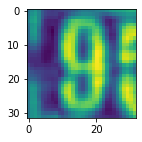

9


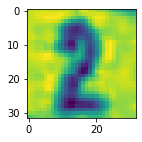

2


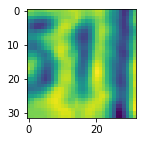

1


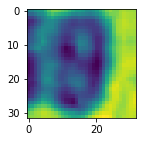

9


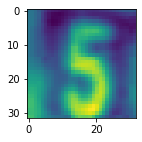

5


In [68]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[3].reshape(32,32))
plt.show()
print(np.argmax(model2.predict(x_test[3].reshape(1,32,32,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[2].reshape(32,32))
plt.show()
print(np.argmax(model2.predict(x_test[2].reshape(1,32,32,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[33].reshape(32,32))
plt.show()
print(np.argmax(model2.predict(x_test[33].reshape(1,32,32,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[59].reshape(32,32))
plt.show()
print(np.argmax(model2.predict(x_test[59].reshape(1,32,32,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[36].reshape(32,32))
plt.show()
print(np.argmax(model2.predict(x_test[36].reshape(1,32,32,1))))

In [69]:
Train = model2.evaluate(x_train, y_train)
print(Train)

22000/22000 [==============================] - 6s 287us/step
[0.102319841503081, 0.975454568862915]


In [70]:
Validation = model2.evaluate(x_test, y_test)
print(Validation)

8000/8000 [==============================] - 2s 274us/step
[0.3928562611192465, 0.9013749957084656]


In [71]:
results_test = pd.DataFrame({'DataSet':['Test'], 'accuracy': Validation[1]},index={'1'})
results_train= pd.DataFrame({'DataSet':['Train'], 'accuracy': [Train[1]]},index={'2'})
results= pd.concat([results_test, results_train])
results= results[['DataSet', 'accuracy']]
results

,DataSet,accuracy
1,Test,0.901375
2,Train,0.975455
